In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/language-translation-englishfrench/eng_-french.csv


> Data Inspection

In [12]:
import pandas as pd
import numpy as np 
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
import keras 
import tensorflow
import nltk
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.decomposition import PCA
from matplotlib import pyplot
from sklearn.feature_extraction.text import CountVectorizer
from mpl_toolkits.mplot3d import Axes3D
from bokeh.plotting import figure, show, output_notebook
from bokeh.models import HoverTool
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from gensim.models import Word2Vec
from sklearn.manifold import TSNE
from textblob import TextBlob
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [13]:
french = pd.read_csv('/kaggle/input/language-translation-englishfrench/eng_-french.csv')

In [14]:
french.head(10)

,English words/sentences,French words/sentences
0,Hi.,Salut!
1,Run!,Cours !
2,Run!,Courez !
3,Who?,Qui ?
4,Wow!,Ça alors !
5,Fire!,Au feu !
6,Help!,À l'aide !
7,Jump.,Saute.
8,Stop!,Ça suffit !
9,Stop!,Stop !


In [15]:
french.tail(10)

,English words/sentences,French words/sentences
175611,Five tremors in excess of magnitude 5.0 on the...,Cinq secousses dépassant la magnitude cinq sur...
175612,No matter how much you try to convince people ...,Peu importe le temps que tu passeras à essayer...
175613,A child who is a native speaker usually knows ...,Un enfant qui est un locuteur natif connaît ha...
175614,There are four main causes of alcohol-related ...,Il y a quatre causes principales de décès liés...
175615,We need to uphold laws against discrimination ...,Nous devons faire respecter les lois contre la...
175616,"Top-down economics never works, said Obama. ""T...","« L'économie en partant du haut vers le bas, ç..."
175617,A carbon footprint is the amount of carbon dio...,Une empreinte carbone est la somme de pollutio...
175618,Death is something that we're often discourage...,La mort est une chose qu'on nous décourage sou...
175619,Since there are usually multiple websites on a...,Puisqu'il y a de multiples sites web sur chaqu...
175620,If someone who doesn't know your background sa...,Si quelqu'un qui ne connaît pas vos antécédent...


In [16]:
french.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175621 entries, 0 to 175620
Data columns (total 2 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   English words/sentences  175621 non-null  object
 1   French words/sentences   175621 non-null  object
dtypes: object(2)
memory usage: 2.7+ MB


In [17]:
#check missing values

missing_values = french.isnull().sum()

In [18]:
missing_values

English words/sentences    0
French words/sentences     0
dtype: int64

> Summary Statistics

In [19]:
french.describe()

,English words/sentences,French words/sentences
count,175621,175621
unique,123100,165975
top,I can't tell you how happy I am that you've co...,Merci bien.
freq,32,9


In [20]:
count_frenchstatistics = french['English words/sentences'].count()
print("French statistic count in column english words/sentences:", count_frenchstatistics)

French statistic count in column english words/sentences: 175621


In [21]:
unique_frenchstatistics = french['English words/sentences'].unique()
print("French statistic unique in column english words/sentences:", unique_frenchstatistics)

French statistic unique in column english words/sentences: ['Hi.' 'Run!' 'Who?' ...
 "Death is something that we're often discouraged to talk about or even think about, but I've realized that preparing for death is one of the most empowering things you can do. Thinking about death clarifies your life."
 'Since there are usually multiple websites on any given topic, I usually just click the back button when I arrive on any webpage that has pop-up advertising. I just go to the next page found by Google and hope for something less irritating.'
 "If someone who doesn't know your background says that you sound like a native speaker, it means they probably noticed something about your speaking that made them realize you weren't a native speaker. In other words, you don't really sound like a native speaker."]


In [22]:
max_frenchstatistics = french['English words/sentences'].max()
print("French statistic max in column english words/sentences:", max_frenchstatistics)

French statistic max in column english words/sentences: iTunes has turned out to be a real cash cow for Apple.


In [31]:
french.columns

Index(['English words/sentences', 'French words/sentences'], dtype='object')

Data Visualization

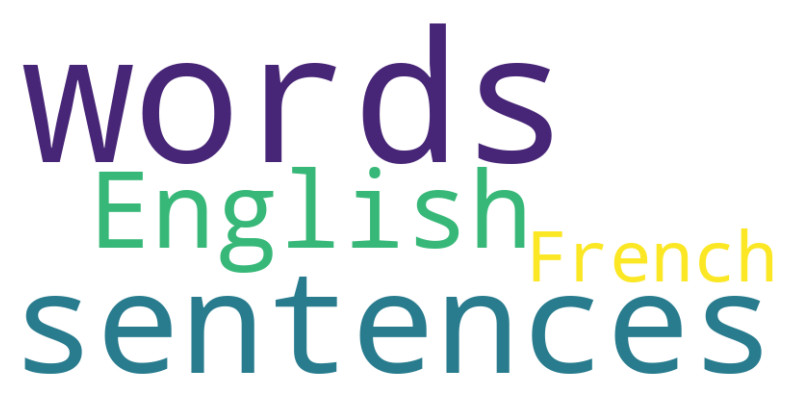

In [35]:
# WordCloud

filename = '/kaggle/input/language-translation-englishfrench/eng_-french.csv'
data = pd.read_csv(filename)

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(data))

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

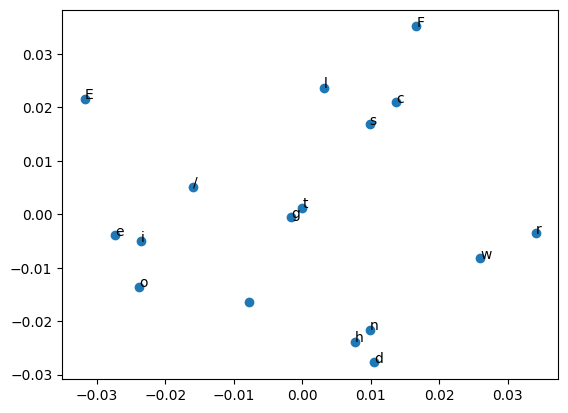

In [37]:
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from matplotlib import pyplot

# Define training data
sentences = french.head()


# Train model
model = Word2Vec(sentences, min_count=1, vector_size=100, window=5, sg=1)

# Fit a 2D PCA model to the vectors
X = model.wv.vectors  # Correct way to access vectors
pca = PCA(n_components=2)
result = pca.fit_transform(X)

# Create a scatter plot of the projection
pyplot.scatter(result[:, 0], result[:, 1])
words = list(model.wv.index_to_key)  # Correct way to get vocabulary words
for i, word in enumerate(words):
    pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

> Neural Machine Translation System

In [4]:
# load text 

filename = '/kaggle/input/txt-1-file/eng_french.txt'
file = open(filename, 'rt')
text = file.read()
file.close()

In [5]:
from pickle import dump

# load doc into memory
def load_doc(filename):
    with open(filename, mode='rt', encoding='utf-8') as file:
        text = file.read()
    return text

In [6]:
# split a loaded document into sentences
def to_pairs(doc):
    lines = doc.strip().split('\n')
    pairs = [line.split('\t') for line in lines]
    return pairs

> Split Text

In [7]:
# load dataset
filename = '/kaggle/input/txt-1-file/eng_french.txt'
doc = load_doc(filename)
# split into english-french pairs
pairs = to_pairs(doc)

In [8]:
# save pairs to file
output_file = '/kaggle/working/english-french.pkl'
with open(output_file, 'wb') as f:
    dump(pairs, f)
    print('Saved: %s' % output_file)

Saved: /kaggle/working/english-french.pkl


In [9]:
import numpy as np
from pickle import load, dump

In [10]:
# load a clean dataset
def load_clean_sentences(filename):
    with open(filename, 'rb') as file:
        sentences = load(file)
    return sentences

In [11]:
# save a list of clean sentences to file
def save_clean_data(sentences, filename):
    with open(filename, 'wb') as file:
        dump(sentences, file)
    print('Saved: %s' % filename)

In [12]:
# load dataset
raw_dataset = load_clean_sentences('/kaggle/working/english-french.pkl')

In [13]:
# reduce dataset size
n_sentences = 10000
dataset = raw_dataset[:n_sentences]

In [14]:
# random shuffle
np.random.shuffle(dataset)

In [15]:
# split into train/test
train, test = dataset[:9000], dataset[9000:]

In [16]:
# save
save_clean_data(dataset, '/kaggle/working/english-french-both.pkl')
save_clean_data(train, '/kaggle/working/english-french-train.pkl')
save_clean_data(test, '/kaggle/working/english-french-test.pkl')

Saved: /kaggle/working/english-french-both.pkl
Saved: /kaggle/working/english-french-train.pkl
Saved: /kaggle/working/english-french-test.pkl


> Train Neural Translation Model

In [17]:
# load a clean dataset
def load_clean_sentences(filename):
 return load(open(filename, 'rb'))

In [18]:
# load datasets
dataset = load_clean_sentences('english-french-both.pkl')
train = load_clean_sentences('english-french-train.pkl')
test = load_clean_sentences('english-french-test.pkl')

In [19]:
# fit a tokenizer
def create_tokenizer(lines):
 tokenizer = Tokenizer()
 tokenizer.fit_on_texts(lines)
 return tokenizer

In [20]:
# max sentence length
def max_length(lines):
 return max(len(line.split()) for line in lines)

In [21]:
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer

In [22]:
# Define create_tokenizer and max_length functions
def create_tokenizer(lines):
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(lines)
    return tokenizer

def max_length(lines):
    return max(len(line.split()) for line in lines)

In [23]:
# Convert dataset to numpy array
dataset = np.array(dataset)

In [24]:
# Prepare English tokenizer
eng_tokenizer = create_tokenizer(dataset[:, 0])
eng_vocab_size = len(eng_tokenizer.word_index) + 1
eng_length = max_length(dataset[:, 0])
print('English Vocabulary Size: %d' % eng_vocab_size)
print('English Max Length: %d' % eng_length)

English Vocabulary Size: 2149
English Max Length: 5


In [25]:
# Prepare Russian tokenizer
french_tokenizer = create_tokenizer(dataset[:, 1])
french_vocab_size = len(french_tokenizer.word_index) + 1
french_length = max_length(dataset[:, 1])
print('French Vocabulary Size: %d' % french_vocab_size)
print('French Max Length: %d' % french_length)

French Vocabulary Size: 4512
French Max Length: 10


In [26]:
# encode and pad sequences
def encode_sequences(tokenizer, length, lines):
 # integer encode sequences
 X = tokenizer.texts_to_sequences(lines)
 # pad sequences with 0 values
 X = pad_sequences(X, maxlen=length, padding='post')
 return X

In [27]:
from numpy import array
from tensorflow.keras.utils import to_categorical

In [28]:
# one hot encode target sequence
def encode_output(sequences, vocab_size):
    ylist = []
    for sequence in sequences:
        encoded = to_categorical(sequence, num_classes=vocab_size)
        ylist.append(encoded)
    y = array(ylist)
    y = y.reshape(sequences.shape[0], sequences.shape[1], vocab_size)
    return y

In [29]:
from numpy import array
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [31]:
# Convert train and test to numpy arrays
train = array(train)
test = array(test)

In [32]:
# Define encode_sequences and encode_output functions if not defined already
def encode_sequences(tokenizer, length, lines):
    # Integer encode sequences
    X = tokenizer.texts_to_sequences(lines)
    # Pad sequences with 0 values
    X = pad_sequences(X, maxlen=length, padding='post')
    return X

def encode_output(sequences, vocab_size):
    ylist = []
    for sequence in sequences:
        encoded = to_categorical(sequence, num_classes=vocab_size)
        ylist.append(encoded)
    y = array(ylist)
    return y

In [33]:
# Prepare training data
trainX = encode_sequences(french_tokenizer, french_length, train[:, 1])
trainY = encode_sequences(eng_tokenizer, eng_length, train[:, 0])
trainY = encode_output(trainY, eng_vocab_size)

In [34]:
# Prepare validation data
testX = encode_sequences(french_tokenizer, french_length, test[:, 1])
testY = encode_sequences(eng_tokenizer, eng_length, test[:, 0])
testY = encode_output(testY, eng_vocab_size)

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, RepeatVector, TimeDistributed, Dense
from tensorflow.keras.utils import plot_model

In [36]:
# Define NMT model
def define_model(src_vocab, tar_vocab, src_timesteps, tar_timesteps, n_units):
    model = Sequential()
    model.add(Embedding(src_vocab, n_units, mask_zero=True))
    model.add(LSTM(n_units))
    model.add(RepeatVector(tar_timesteps))
    model.add(LSTM(n_units, return_sequences=True))
    model.add(TimeDistributed(Dense(tar_vocab, activation='softmax')))
    return model

In [37]:
# Define model
model = define_model(french_vocab_size, eng_vocab_size, french_length, eng_length, 256)

2024-04-05 00:30:20.546191: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2024-04-05 00:30:20.546315: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2024-04-05 00:30:20.546401: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2024-04-05 00:30:20.546484: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2024-04-05 00:30:20.546577: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2024-04-05 00:30:20.546779: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this stream.
2024-04-05 00:30:20.546873: E external/local_xla/xla/stream_executor/stream_executor_internal.h:177] SetPriority unimplemented for this 

In [38]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy')

In [40]:
# Build the model
model.build((None, french_length))  # Assume the input shape is (None, ger_length)

In [41]:
# Summarize defined model
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 10, 256)        │     1,155,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 256)            │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector (RepeatVector)    │ (None, 5, 256)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 5, 256)         │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 5, 2149)        │       552,293 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,757,989 (10.52 MB)

 Trainable params: 2,757,989 (10.52 MB)

 Non-trainable params: 0 (0.00 B)

None


> Evaluate Neural Translation Model

In [42]:
# Load datasets
dataset = load_clean_sentences('/kaggle/working/english-french-both.pkl')
train = load_clean_sentences('/kaggle/working/english-french-train.pkl')
test = load_clean_sentences('/kaggle/working/english-french-test.pkl')

In [43]:
# Convert train and test to NumPy arrays
train = np.array(train)
test = np.array(test)

In [44]:
# Convert dataset to a NumPy array
dataset = np.array(dataset)

In [45]:
# Prepare English tokenizer
eng_tokenizer = create_tokenizer(dataset[:, 0])
eng_vocab_size = len(eng_tokenizer.word_index) + 1
eng_length = max_length(dataset[:, 0])

In [46]:
# Prepare French tokenizer
french_tokenizer = create_tokenizer(dataset[:, 1])
french_vocab_size = len(french_tokenizer.word_index) + 1
french_length = max_length(dataset[:, 1])

In [47]:
# Prepare data
trainX = encode_sequences(eng_tokenizer, eng_length, train[:, 0])  # Use eng_tokenizer here
testX = encode_sequences(eng_tokenizer, eng_length, test[:, 0])  # Use eng_tokenizer here

In [48]:
from numpy import argmax

# Define function to map an integer to a word in the tokenizer's vocabulary
def word_for_id(integer, tokenizer):
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

# Generate target sequence given source sequence
def predict_sequence(model, tokenizer, source):
    prediction = model.predict(source, verbose=0)[0]
    integers = [argmax(vector) for vector in prediction]
    target = []
    for i in integers:
        word = word_for_id(i, tokenizer)
        if word is None:
            break
        target.append(word)
    return ' '.join(target)

In [49]:
!pip install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 18.9 MB/s eta 0:00:0000:010:01

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [50]:
import nltk
nltk.download('punkt')
from nltk.translate.bleu_score import corpus_bleu

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [52]:
from nltk.translate.bleu_score import corpus_bleu
import pickle

# Read the translations from the pickle file
with open('/kaggle/working/english-french-both.pkl', 'rb') as file:
    data = pickle.load(file)

references = []
hypotheses = []

# Check if data is a list of dictionaries or just a list
if isinstance(data, list):
    # Assume each entry is a list of strings (target, predicted)
    for entry in data:
        if isinstance(entry, list) and len(entry) >= 2:
            target, predicted = entry[:2]  # Take the first two elements
            references.append(target.split())
            hypotheses.append(predicted.split())
else:
    # Assume data is a dictionary
    target = data.get('target', '')
    predicted = data.get('predicted', '')
    references.append(target.split())
    hypotheses.append(predicted.split())

# Print translations for debugging (comment out if not needed)
for ref, hyp in zip(references, hypotheses):
    print(f"target={ref}, predicted={hyp}")

# Calculate BLEU scores
bleu1 = corpus_bleu(references, hypotheses, weights=(1, 0, 0, 0))
bleu2 = corpus_bleu(references, hypotheses, weights=(0.5, 0.5, 0, 0))
bleu3 = corpus_bleu(references, hypotheses, weights=(0.33, 0.33, 0.33, 0))
bleu4 = corpus_bleu(references, hypotheses, weights=(0.25, 0.25, 0.25, 0.25))

print("\nBLEU scores:")
print(f"BLEU-1: {bleu1}")
print(f"BLEU-2: {bleu2}")
print(f"BLEU-3: {bleu3}")
print(f"BLEU-4: {bleu4}")

target=['Are', 'we', 'prepared?'], predicted=['Sommes-nous', 'prêtes', '?']
target=['I', 'see', 'a', 'star.'], predicted=['Je', 'vois', 'une', 'étoile.']
target=['We', 'must', 'hurry.'], predicted=['Il', 'nous', 'faut', 'nous', 'dépêcher.']
target=['Is', 'this', 'love?'], predicted=['Est-ce', "l'amour", '?']
target=["I'm", 'driving.'], predicted=['Je', 'suis', 'en', 'train', 'de', 'conduire.']
target=['He', 'killed', 'him.'], predicted=['Il', "l'a", 'tué.']
target=['Ghosts', 'exist.'], predicted=['Les', 'fantômes', 'existent.']
target=["That's", 'a', 'lie.'], predicted=['Il', "s'agit", "d'un", 'mensonge.']
target=['Are', 'you', 'kidding?'], predicted=['Vous', 'plaisantez', '?']
target=['Go', 'ahead.'], predicted=['Vas-y.']
target=["I've", 'messed', 'up.'], predicted=["J'ai", 'tout', 'foutu', 'en', "l'air."]
target=["I'm", 'bald.'], predicted=['Je', 'suis', 'chauve.']
target=["I'll", 'manage', 'it.'], predicted=['Je', 'gérerai', 'ça.']
target=['You', 'will', 'die.'], predicted=['Tu', 'm

/usr/local/lib/python3.10/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/site-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_


BLEU scores:
BLEU-1: 0.04880187936458398
BLEU-2: 3.2062293547472608e-155
BLEU-3: 3.165853944158951e-204
BLEU-4: 8.218141325880606e-232
